# Spatial Networks

## Planarization

Planar graphs are interesting but real life Spatial Networks are usually not planar. One way to make them planar is to split edges where they are crossing. This notebook shows some cases of planarization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from spatial_networks import SpatialNode, SpatialEdge, SpatialGraph
from shapely.geometry import Point, LineString

SpatialGraph with 4 nodes and 2 edges


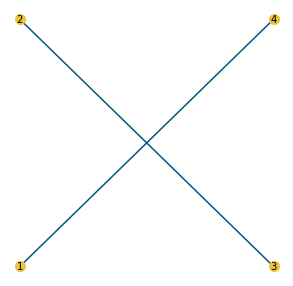

In [2]:
nodes = [
    SpatialNode(
        name=1,
        geometry=Point(0, 0)
    ),
    SpatialNode(
        name=2,
        geometry=Point(0, 1)
    ),
    SpatialNode(
        name=3,
        geometry=Point(1, 0)
    ),
    SpatialNode(
        name=4,
        geometry=Point(1, 1)
    )
]

edges = [
    SpatialEdge(
        start=1,
        stop=4
    ),
    SpatialEdge(
        start=2,
        stop=3
    )
]

graph = SpatialGraph(nodes=nodes, edges=edges)

print(graph)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

graph.draw(ax=ax, include_names=True)

ax.axis("off")

plt.show()

We can see that the edges (2, 3) and (1, 4) are crossing. If this graph represented a city, it could be a bridge or a tunnel. For some use cases, it is easier to assume that these are regular crossroads. In _G. Boeing, Environment and planning B: urban analytics and city science_, we can see that this approximation is not far-fetched for a lot of cities.

To transform this graph into a planar one, we can use the `make_planar` function

SpatialGraph with 5 nodes and 4 edges


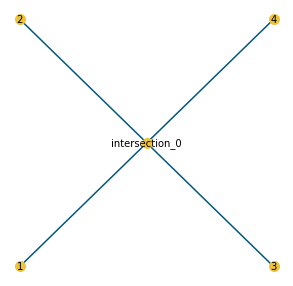

In [3]:
from spatial_networks.utils import make_planar

new_graph = make_planar(graph)

print(new_graph)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

new_graph.draw(ax=ax, include_names=True)

ax.axis("off")

plt.show()

This function can deal with multiple intersections on a single edge:

SpatialGraph with 10 nodes and 5 edges


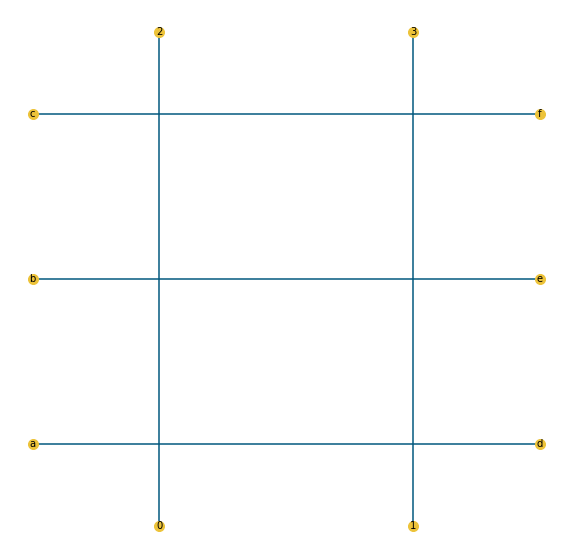

In [4]:
from string import printable

printable = printable[10:]

nodes = [
    SpatialNode(name=printable[i + 3 * j], geometry=Point(j, i)) for i in range(3) for j in range(2)
] + [
    SpatialNode(name=str(i * 2 + j), geometry=Point(0.25 + j * 0.5 , -0.5 + i * 3)) for i in range(2) for j in range(2)
]


edges = [
    SpatialEdge(start=printable[i], stop=printable[i + 3]) for i in range(3)
] + [
    SpatialEdge(start=str(i), stop=str(2 + i)) for i in range(2)
]

graph = SpatialGraph(nodes=nodes, edges=edges)

print(graph)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

graph.draw(ax=ax, include_names=True)

ax.axis("off")

plt.show()

SpatialGraph with 16 nodes and 17 edges


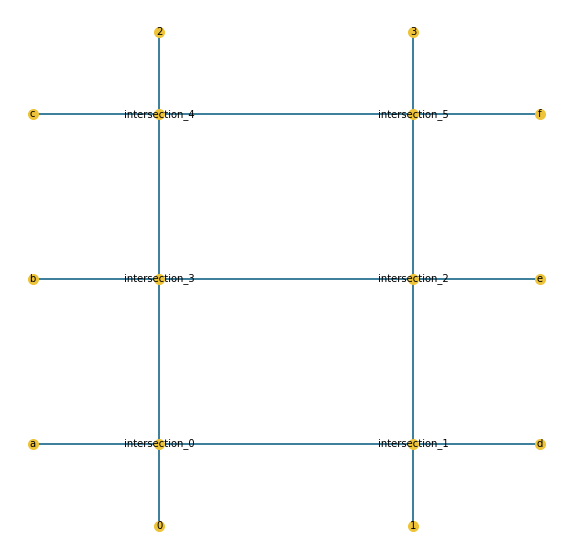

In [5]:
new_graph = make_planar(graph)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

print(new_graph)
new_graph.draw(ax=ax, include_names=True)

ax.axis("off")

plt.show()

In some cases, we can have an edge that crosses another edge multiple times !

SpatialGraph with 4 nodes and 2 edges


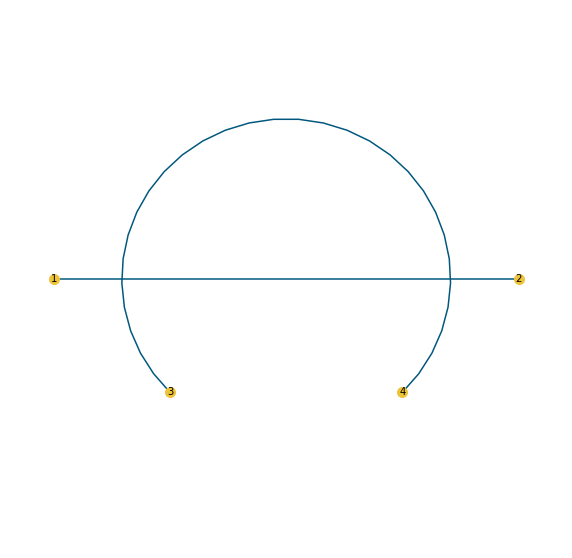

In [6]:
from spatial_networks.utils import create_circle_arc

nodes = [
    SpatialNode(1, Point(0, 0)),
    SpatialNode(2, Point(10, 0)),
    SpatialNode(3, Point(2.5, -2.5)),
    SpatialNode(4, Point(7.5, -2.5)),
]

edge_geometry = create_circle_arc(
    start=nodes[3]["geometry"],
    stop=nodes[2]["geometry"],
    center=Point(5, 0),
    nb_points=30, 
    
)

edges = [
    SpatialEdge(start=1, stop=2),
    SpatialEdge(start=4, stop=3, geometry=edge_geometry)
]

graph = SpatialGraph(nodes=nodes, edges=edges)

print(graph)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

graph.draw(ax=ax, include_names=True)
ax.set_xlim(-1, 11)
ax.set_ylim(-6, 6)
ax.axis("off")

plt.show()

SpatialGraph with 6 nodes and 6 edges


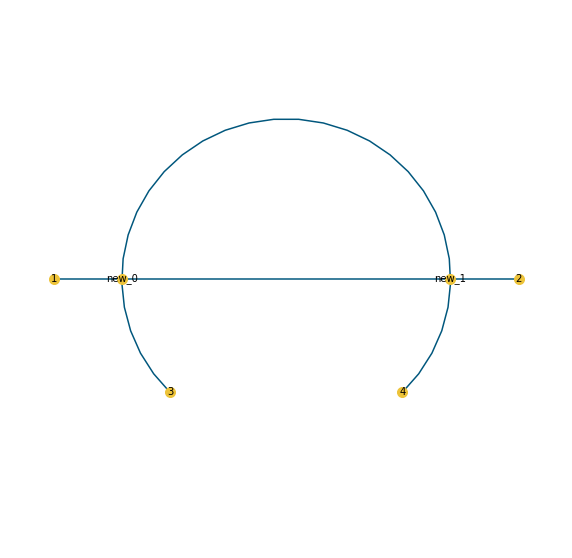

In [7]:
new_graph = make_planar(graph, prefix="new")

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

print(new_graph)
new_graph.draw(ax=ax, include_names=True)

ax.axis("off")
ax.set_xlim(-1, 11)
ax.set_ylim(-6, 6)
ax.axis("off")
plt.show()

SoftRGG with 20 nodes and 21 edges


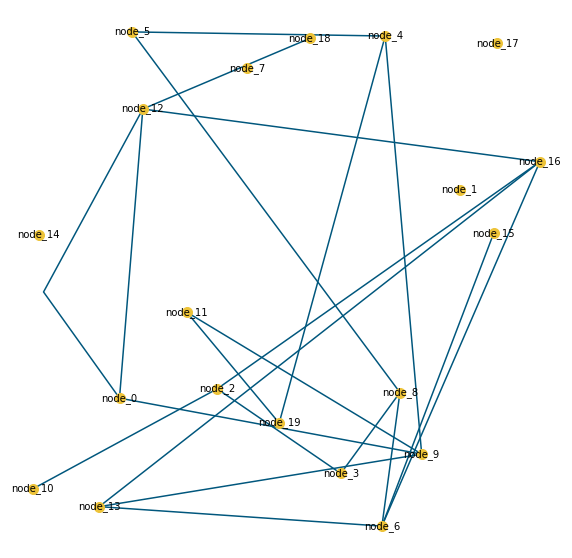

In [8]:
from spatial_networks import SoftRGG

import networkx as nx

rng = np.random.default_rng(12345)

my_random_spatial_graph = SoftRGG(
    number_of_nodes=20, 
    position_distribution=rng.uniform,
    deterrence_function=lambda x: rng.random() < .1
    
)


my_random_spatial_graph.add_edge(
    SpatialEdge(
        start="node_0",
        stop="node_12",
        geometry=LineString(
            [
                my_random_spatial_graph.node_properties_dict()["node_0"]["geometry"],
                Point(0.1, 0.5),
                my_random_spatial_graph.node_properties_dict()["node_12"]["geometry"]
            ]
        ),
        some_key="value"
    )
)
print(my_random_spatial_graph)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

my_random_spatial_graph.draw(ax=ax, include_names=True)

nx.set_edge_attributes(G=my_random_spatial_graph, values={("node_0", "node_12", 0): {"hello": "world"}})

# ax.axis("off")

plt.show()

SpatialGraph with 55 nodes and 91 edges


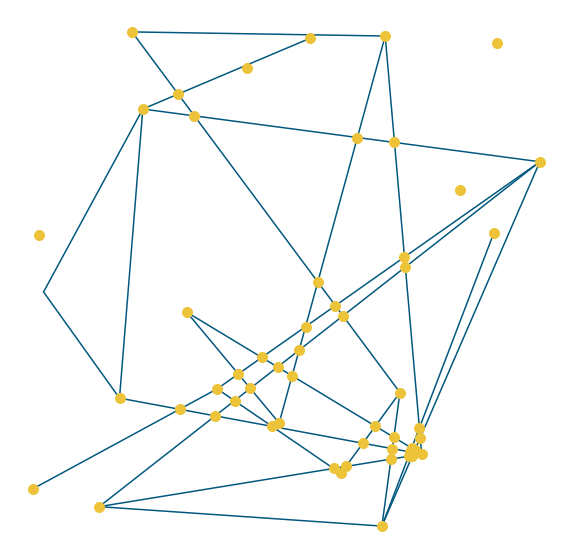

In [9]:
my_new_graph = make_planar(my_random_spatial_graph, keep_data=True)
print(my_new_graph)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

my_new_graph.draw(ax=ax)
ax.axis("off")

plt.show()

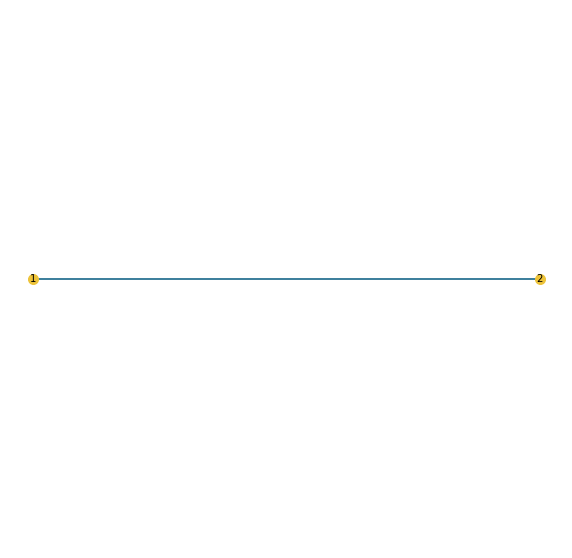

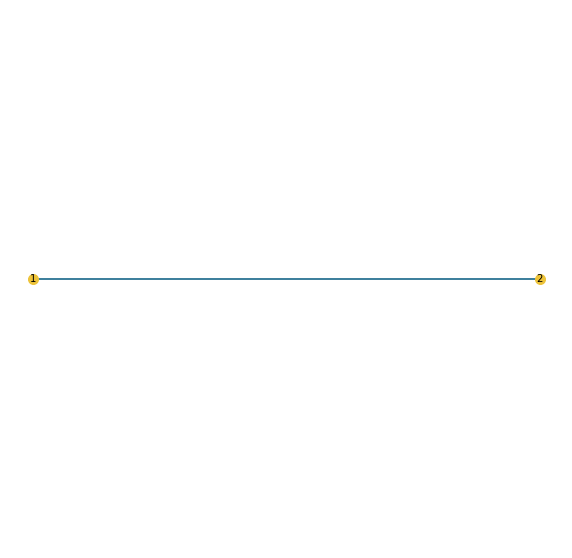

In [10]:
nodes = [
    SpatialNode(1, geometry=Point(0, 0)),
    SpatialNode(2, geometry=Point(1, 0))
]

edges = [SpatialEdge(start=1, stop=2)]

my_graph = SpatialGraph(nodes, edges)


fig, ax = plt.subplots(1, 1, figsize=(10, 10))

my_graph.draw(ax=ax, include_names=True)

plt.show()

my_new_graph = make_planar(my_graph)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

my_new_graph.draw(ax=ax, include_names=True)

plt.show()